In [1]:
%cd ..

/Users/juansegundohevia/Documents/repos/TexTract


In [2]:
import pickle as pkl
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns
from pix2tex import multiline_utils

In [3]:
with open("notebooks/final_analysis/FINAL-OUTPUT-MULTILINE.pkl", "rb") as f:
    results = pkl.load(f)

/Users/juansegundohevia/anaconda3/envs/pix2text/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
with open("notebooks/multiline_performance/ml_output-no-finetuning.pkl", "rb") as f:
    results_no_ft = pkl.load(f)

In [10]:
results.keys()
# unpack into variables
bleus = results['bleu_list']
edit_distances = results['edit_dists_list']
token_acc = results['token_acc_list']
predictions = results["preds"]
dataset = results["dataset"]

In [11]:
edit_distances[:10]

[0.9228571428571428,
 2.3651226158038146,
 0.9116883116883117,
 0.3825503355704698,
 1.0024752475247525,
 2.916376306620209,
 0.6378378378378379,
 0.44680851063829785,
 1.001675041876047,
 0.9127725856697819]

In [27]:
''.join(predictions["750"]["pred_tokens"][0])

'\\qquad\\qquad\\qquad\\qquad\\qquad\\qquad\\qquad\\qquad\\qquad\\qquad\\qquad\\qquad\\qquad\\qquad\\qquad\\qquad\\qquad\\qquad\\qquad\\qquad\\qquad\\qquad\\qquad\\qquad\\qquad\\qquad\\qquad\\qquad\\qquad\\qquad\\qquad\\qquad\\qquad\\qquad\\qquad\\qquad\\qquad\\qquad\\begin{array}{r}{\\beta{\\hat{\\varphi}}_{n+1}+4\\beta{\\hat{\\varphi}}_{n}+\\beta{\\hat{\\varphi}}}\\\\{\\quad{\\frac{\\sin\\gamma}{\\sin\\operatorname*{max}\\pi\\pi\\pi\\pi\\pi\\pi\\pi\\pi\\pi\\pi\\pi\\pi\\pi\\pi\\pi\\pi\\pi\\pi\\pi\\pi\\pi\\pi\\pi\\pi\\pi\\pi\\pi\\pi\\pi\\pi\\pi\\pi\\pi\\pi\\pi\\pi\\pi\\pi\\pi\\pi\\pi\\pi\\pi\\pi\\pi\\pi\\pi\\pi\\pi\\pi\\pi\\pi\\pi\\pi\\pi\\pi\\pi\\pi\\pi\\pi\\pi\\pi\\pi\\pi\\pi\\pi\\pi\\pi\\pi\\pi\\pi\\pi\\pi\\pi\\pi\\pi\\pi\\pi\\pi\\pi\\pi\\pi\\pi\\pi\\pi\\pi\\pi\\pi\\pi\\pi\\pi\\pi\\pi\\pi\\pi\\pi\\pi\\pi\\pi\\pi\\pi\\pi\\pi\\pi\\pi\\pi\\pi\\pi\\pi\\pi\\pi\\pi\\pi\\pi\\pi\\pi\\pi\\pi\\pi\\pi\\pi\\pi\\pi\\pi\\pi\\pi\\pi\\pi\\pi\\pi\\pi\\pi\\pi\\pi\\pi\\pi\\pi\\pi\\pi\\pi\\pi\\pi\\pi\\

In [28]:
len(predictions.keys())

979

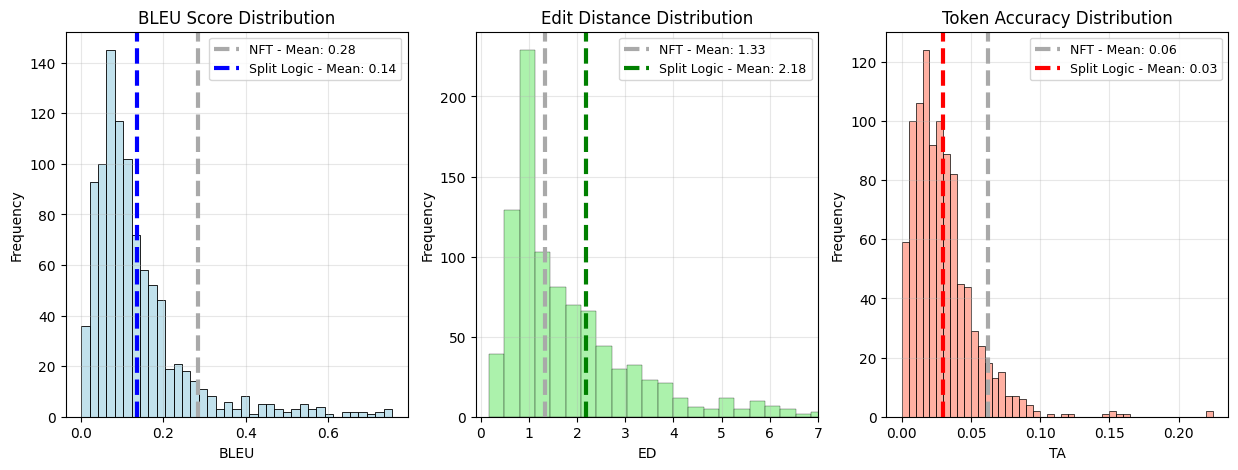

In [94]:
fig, ax = plt.subplots(1,3, figsize=(15,5))

sns.histplot(results["bleu_list"], ax=ax[0], color="lightblue")
ax[0].set_title("BLEU Score Distribution")
ax[0].axvline(np.mean(results_no_ft["bleu_score"]), color="darkgray", linestyle="--", lw=3, label="NFT - Mean: {:.2f}".format(np.mean(results_no_ft["bleu_score"])))
ax[0].axvline(np.mean(results["bleu_score"]), color="blue", linestyle="--", lw=3, label="Split Logic - Mean: {:.2f}".format(np.mean(results["bleu_score"])))


sns.histplot(results["edit_dists_list"], ax=ax[1], color="lightgreen")
ax[1].set_title("Edit Distance Distribution")
ax[1].set_xlim([-.1, 7])
ax[1].axvline(np.mean(results_no_ft["edit_distance"]), color="darkgray", linestyle="--", lw=3, label="NFT - Mean: {:.2f}".format(np.mean(results_no_ft["edit_distance"])))
ax[1].axvline(np.mean(results["edit_distance"]), color="green", linestyle="--", lw=3, label="Split Logic - Mean: {:.2f}".format(np.mean(results["edit_distance"])))

sns.histplot(results["token_acc_list"], ax=ax[2], color="tomato", alpha=.5)
ax[2].set_title("Token Accuracy Distribution")
ax[2].axvline(np.mean(results_no_ft["token_accuracy"]), color="darkgray", linestyle="--", lw=3, label="NFT - Mean: {:.2f}".format(np.mean(results_no_ft["token_accuracy"])))
ax[2].axvline(np.mean(results["token_accuracy"]), color="red", linestyle="--", lw=3, label="Split Logic - Mean: {:.2f}".format(np.mean(results["token_accuracy"])))


for sax, metric in zip(ax, ["BLEU", "ED", "TA"]):
    sax.legend(fontsize=9)
    sax.set_xlabel(metric)
    sax.set_ylabel("Frequency")
    sax.grid(True, alpha=.3)

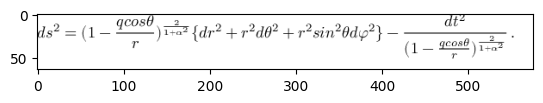

In [47]:
import cv2

sample_image = cv2.imread("../pix2tex/dataset/formulae/test/0000001.png")
plt.imshow(sample_image)

In [48]:
sample_image.shape

(64, 576, 3)

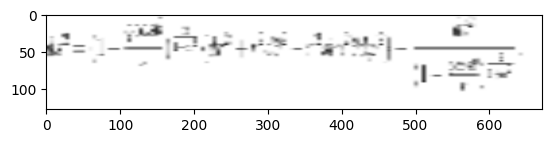

In [51]:
# resize to
sample_image = cv2.resize(sample_image, (672, 128))
plt.imshow(sample_image)

# Compare with results fine tuning

In [33]:
with open("multiline_performance/ml_output.pkl", "rb") as f:
    results_ft = pkl.load(f)

In [35]:
# Print scores
print("Multi Line Model Scores")
print("BLEU Score: ", results["bleu_score"])
print("Edit Distance: ", results["edit_distance"])
print("Token Accuracy: ", results["token_accuracy"])

Multi Line Model Scores
BLEU Score:  0.1353904945309462
Edit Distance:  2.18107802976436
Token Accuracy:  0.02956958431593089


In [36]:
# Print scores
print("Multi Line Model Scores")
print("BLEU Score: ", results_no_ft["bleu_score"])
print("Edit Distance: ", results_no_ft["edit_distance"])
print("Token Accuracy: ", results_no_ft["token_accuracy"])

Multi Line Model Scores
BLEU Score:  0.2831747321765366
Edit Distance:  1.332809210727104
Token Accuracy:  0.062485670852169516


In [37]:
# Print scores
print("Multi Line Model Scores")
print("BLEU Score: ", results_ft["bleu_score"])
print("Edit Distance: ", results_ft["edit_distance"])
print("Token Accuracy: ", results_ft["token_accuracy"])

Multi Line Model Scores
BLEU Score:  0.17442291762028722
Edit Distance:  1.6847542807436957
Token Accuracy:  0.05369844352091724


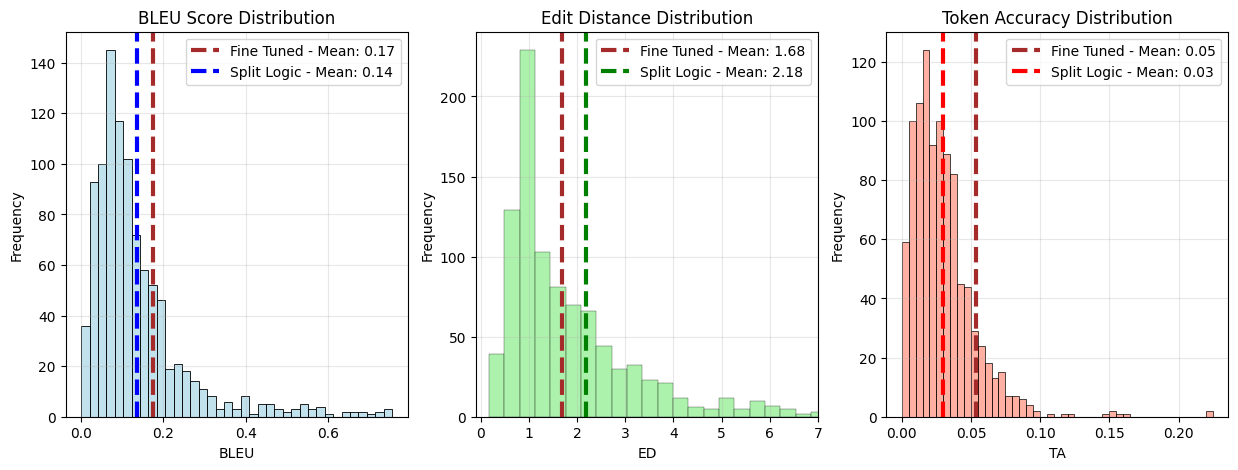

In [38]:
fig, ax = plt.subplots(1,3, figsize=(15,5))

sns.histplot(results["bleu_list"], ax=ax[0], color="lightblue")
ax[0].set_title("BLEU Score Distribution")
ax[0].axvline(np.mean(results_ft["bleu_score"]), color="brown", linestyle="--", lw=3, label="Fine Tuned - Mean: {:.2f}".format(np.mean(results_ft["bleu_score"])))
ax[0].axvline(np.mean(results["bleu_score"]), color="blue", linestyle="--", lw=3, label="Split Logic - Mean: {:.2f}".format(np.mean(results["bleu_score"])))
ax[0].legend()


sns.histplot(results["edit_dists_list"], ax=ax[1], color="lightgreen")
ax[1].set_title("Edit Distance Distribution")
ax[1].set_xlim([-.1, 7])
ax[1].axvline(np.mean(results_ft["edit_distance"]), color="brown", linestyle="--", lw=3, label="Fine Tuned - Mean: {:.2f}".format(np.mean(results_ft["edit_distance"])))
ax[1].axvline(np.mean(results["edit_distance"]), color="green", linestyle="--", lw=3, label="Split Logic - Mean: {:.2f}".format(np.mean(results["edit_distance"])))
ax[1].legend()

sns.histplot(results["token_acc_list"], ax=ax[2], color="tomato", alpha=.5)
ax[2].set_title("Token Accuracy Distribution")
ax[2].axvline(np.mean(results_ft["token_accuracy"]), color="brown", linestyle="--", lw=3, label="Fine Tuned - Mean: {:.2f}".format(np.mean(results_ft["token_accuracy"])))
ax[2].axvline(np.mean(results["token_accuracy"]), color="red", linestyle="--", lw=3, label="Split Logic - Mean: {:.2f}".format(np.mean(results["token_accuracy"])))
ax[2].legend()


for sax, metric in zip(ax, ["BLEU", "ED", "TA"]):
    sax.set_xlabel(metric)
    sax.set_ylabel("Frequency")
    sax.grid(True, alpha=.3)

# Curve distribution analysis

In [6]:
import cv2
import os

In [11]:
fnames = os.listdir("notebooks/final_analysis/imagenes_classify_inf/")

fnames = sorted(fnames, key=lambda s: int(s.split(".")[0]))

fm_fnames = fnames[:500]
hw_fnames = fnames[500:]

fm_fnames[-2:]

['0000498.png', '0000499.png']

In [12]:
def scale_calibration(img):
    #read img
    scale = cv2.imread(img, cv2.IMREAD_GRAYSCALE)
    #invert background
    scale = 255 - scale
    #binarize img
    _, scale_bin = cv2.threshold(scale, 40, 255, cv2.THRESH_BINARY)
    #get bounding rectangle to get width of the scale
    x, y, w, h = cv2.boundingRect(scale_bin) 
    #define calibration (known distance / distance in pixels of scale)
    calibration = 0.5 / w
    #plot bounding rectangle to debug
    plt.imshow(cv2.rectangle(scale, cv2.boundingRect(scale_bin), (255, 255, 0), 2))
    
    return calibration

0.0011037527593818985

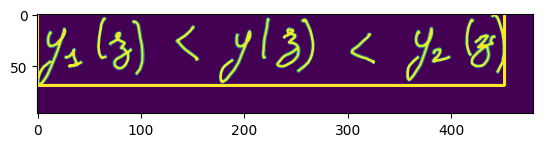

In [17]:
IMAGE_PATH = "notebooks/final_analysis/imagenes_classify_inf"

test = scale_calibration(os.path.join(IMAGE_PATH, hw_fnames[3]))
test

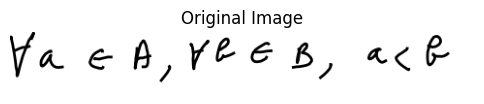

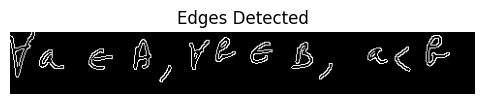

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def load_and_convert_image(image_path):
    # Load an image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    return image

def apply_canny_edge_detector(image, low_threshold=50, high_threshold=150):
    # Apply Canny Edge Detector
    edges = cv2.Canny(image, low_threshold, high_threshold)
    return edges

def display_image(image, title="Image"):
    # Use matplotlib to display an image
    plt.figure(figsize=(6,6))
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Load and convert the image
image_path = os.path.join(IMAGE_PATH, hw_fnames[2])
image = load_and_convert_image(image_path)
edges = apply_canny_edge_detector(image)

# Display the original and edged images
display_image(image, "Original Image")
display_image(edges, "Edges Detected")

# Further steps would involve analyzing these edges to find curves


In [54]:
hw_fnames[2]

'0000502.png'

In [19]:
def find_contours(edges):
    # Find contours in the edge image
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    return contours

def calculate_contour_length(contours):
    lengths = [cv2.arcLength(contour, closed=False) for contour in contours]
    return lengths

def curvature_estimation(contours):
    curvatures = []
    for contour in contours:
        if len(contour) > 5:  # Need at least 5 points to fit a polynomial
            # Approximate contour with a polynomial
            vx, vy, x0, y0 = cv2.fitLine(contour, cv2.DIST_L2, 0, 0.01, 0.01)
            # Calculate the tangent angle (slope)
            tangent_angle = np.arctan2(vy, vx)
            # Convert angle to degrees for easier interpretation
            tangent_angle = np.degrees(tangent_angle)
            curvatures.append(tangent_angle)
    return curvatures

# Assuming 'edges' is the edge-detected image obtained from previous steps
contours = find_contours(edges)
lengths = calculate_contour_length(contours)
angles = curvature_estimation(contours)

print("Lengths of detected contours:", lengths)
print("Angles of curvature:", angles)


Lengths of detected contours: [44.28427076339722, 43.870057225227356, 82.18376541137695, 244.16652047634125, 86.11269783973694, 67.35533797740936, 79.74011373519897, 133.154327750206, 253.651801943779, 96.59797859191895, 107.8406195640564, 104.08326029777527, 135.74011409282684, 191.71067678928375, 84.18376517295837]
Angles of curvature: [array([-56.542294], dtype=float32), array([-49.643784], dtype=float32), array([26.591995], dtype=float32), array([-36.467762], dtype=float32), array([-76.06411], dtype=float32), array([26.11742], dtype=float32), array([74.531265], dtype=float32), array([-79.9204], dtype=float32), array([-55.704094], dtype=float32), array([-73.87366], dtype=float32), array([-84.13805], dtype=float32), array([-74.62778], dtype=float32), array([-85.98739], dtype=float32), array([-68.477486], dtype=float32), array([-21.414375], dtype=float32)]


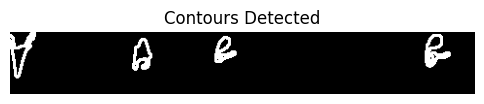

In [32]:
# plot the contours
def plot_contours(image, contours, title="Contours"):
    # Create an output image that's the same size as the original
    output = np.zeros_like(image)
    # Draw all the contours
    cv2.drawContours(output, contours, -1, (255, 255, 255), 2)
    # Display image
    display_image(output, title)

plot_contours(image, contours[10:], "Contours Detected")

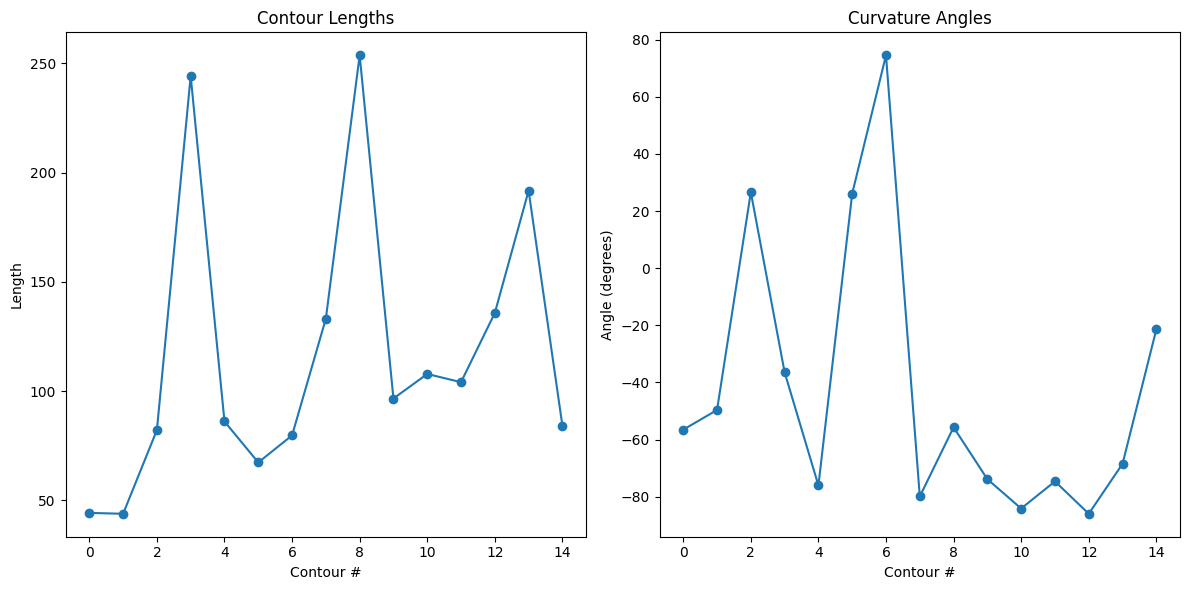

In [21]:
# plot lengths and angles in a line plot
def plot_contour_info(lengths, angles):
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    ax[0].plot(lengths, marker='o')
    ax[0].set_title("Contour Lengths")
    ax[0].set_xlabel("Contour #")
    ax[0].set_ylabel("Length")

    ax[1].plot(angles, marker='o')
    ax[1].set_title("Curvature Angles")
    ax[1].set_xlabel("Contour #")
    ax[1].set_ylabel("Angle (degrees)")

    plt.tight_layout()
    plt.show()

plot_contour_info(lengths, angles)

In [69]:
# compute a series of metrics for curvatures
def compute_curvature_metrics(curvatures, contours):
    _arr = np.array(curvatures).flatten()
    _arr = np.abs(_arr)

    return {
        "curv_mean": np.mean(_arr),
        "curv_std": np.std(_arr),
        "curv_variance": np.var(_arr),
        "curv_max": np.max(_arr),
        "curv_min": np.min(_arr),
        "curv_median": np.median(_arr)
    }


curvature_metrics = compute_curvature_metrics(angles, lengths)
curvature_metrics

{'curv_mean': 59.340126,
 'curv_std': 21.664433,
 'curv_variance': 469.34766,
 'curv_max': 85.98739,
 'curv_min': 21.414375,
 'curv_median': 68.477486}

In [70]:
def compute_curvature(contour):
    # Compute the perimeter (arc length) of the contour
    perimeter = cv2.arcLength(contour, True)
    
    # Compute the area of the contour
    area = cv2.contourArea(contour)
    
    # Avoid division by zero
    if perimeter == 0:
        return 0
    
    # Compute the curvature
    curvature = 4 * np.pi * area / (perimeter ** 2)
    
    return curvature

In [73]:
def get_angle_metrics(fname):
    """
    Put everything together
    """

    image_path = os.path.join(IMAGE_PATH, fname)
    image = load_and_convert_image(image_path)
    edges = apply_canny_edge_detector(image)
    
    # Assuming 'edges' is the edge-detected image obtained from previous steps
    contours = find_contours(edges)
    lengths = calculate_contour_length(contours)
    angles = curvature_estimation(contours)

    # Compute curvature metrics
    # curvature_metrics = compute_curvature_metrics(angles, lengths)
    curvs = [compute_curvature(cont) for cont in contours]

    return {
        "fname": fname,
        "mean": np.mean(curvs),
        "std": np.std(curvs),
        "variance": np.var(curvs),
        "max": np.max(curvs),
        "min": np.min(curvs),
        "median": np.median(curvs)
        }

In [74]:
from tqdm import tqdm

rows = []

for fname in tqdm(fnames):
    row = get_angle_metrics(fname)
    rows.append(row)

100%|██████████| 1000/1000 [00:00<00:00, 1581.55it/s]


In [75]:
curv_data = pd.DataFrame(rows)
curv_data.describe()

,mean,std,variance,max,min,median
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.133883,0.162513,0.033426,0.574222,0.001754,0.068471
std,0.084787,0.083798,0.027665,0.281543,0.027605,0.081063
min,0.000021,0.000000,0.000000,0.000021,0.000000,0.000000
25%,0.082055,0.104531,0.010927,0.362777,0.000000,0.016738
50%,0.121454,0.174501,0.030451,0.698432,0.000000,0.039467
75%,0.175485,0.218128,0.047580,0.800106,0.000284,0.093213
max,0.863817,0.398253,0.158605,0.935941,0.863817,0.863817


In [76]:
curv_data["formula_type"] = curv_data.fname.apply(lambda s: "FM" if int(s.split(".")[0]) < 500 else "HW")

curv_data.groupby("formula_type").describe().T

formula_type            FM          HW
mean     count  500.000000  500.000000
         mean     0.129906    0.137860
         std      0.049272    0.109236
         min      0.025491    0.000021
         25%      0.096054    0.042713
         50%      0.120165    0.124134
         75%      0.156781    0.211857
         max      0.359085    0.863817
std      count  500.000000  500.000000
         mean     0.183153    0.141874
         std      0.046648    0.105017
         min      0.039364    0.000000
         25%      0.151709    0.046912
         50%      0.181999    0.126410
         75%      0.212467    0.226864
         max      0.363228    0.398253
variance count  500.000000  500.000000
         mean     0.035717    0.031135
         std      0.017861    0.034679
         min      0.001549    0.000000
         25%      0.023016    0.002201
         50%      0.033124    0.015980
         75%      0.045142    0.051468
         max      0.131935    0.158605
max      count  500.000000  500.000000
         mean     0.704168    0.444276
         std      0.145334    0.322071
         min      0.160757    0.000021
         25%      0.625057    0.132418
         50%      0.776264    0.411093
         75%      0.800106    0.788052
         max      0.935941    0.922727
min      count  500.000000  500.000000
         mean     0.000156    0.003353
         std      0.002294    0.038925
         min      0.000000    0.000000
         25%      0.000000    0.000000
         50%      0.000000    0.000271
         75%      0.000000    0.001345
         max      0.036539    0.863817
median   count  500.000000  500.000000
         mean     0.044684    0.092259
         std      0.042172    0.101209
         min      0.000000    0.000000
         25%      0.017286    0.013359
         50%      0.032490    0.067306
         75%      0.057675    0.133259
         max      0.336825    0.863817

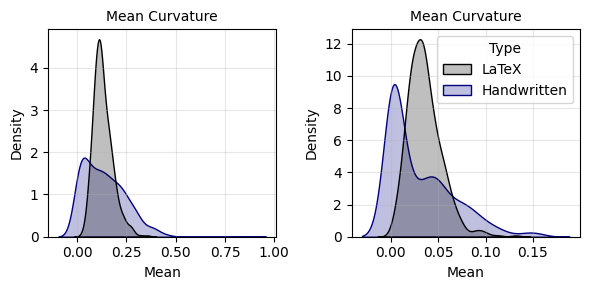

In [140]:
fig, ax = plt.subplots(1,2,figsize=(6,3))
VAR = "mean"
aux = curv_data.rename(columns={"formula_type": "Type"})\
                                .replace({"Type": {"FM": "LaTeX", "HW": "Handwritten"}})
# plot mean curvature
kdeplot = sns.kdeplot(data=aux,
                    x="mean", hue="Type", palette={"Handwritten": "navy", "LaTeX": "black"},
                    ax=ax[0], fill=True, legend=True)

kdeplot = sns.kdeplot(data=aux,
                    x="variance", hue="Type", palette={"Handwritten": "navy", "LaTeX": "black"},
                    ax=ax[1], fill=True, legend=False)

for sax in ax:
    sax.set_title(f"{VAR.title()} Curvature", fontsize=10)
    sax.set_xlabel(VAR.title())
    sax.grid(True, alpha=.3)
plt.tight_layout()

# plt.savefig(f"notebooks/final_analysis/{VAR}_curvature.png")


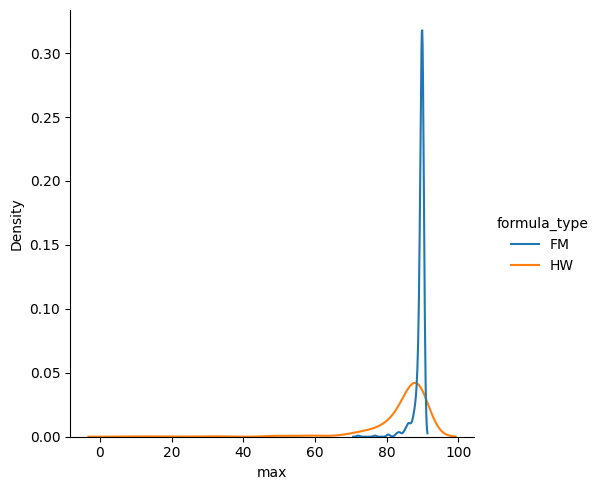

In [62]:
sns.displot(curv_data, x="max", hue="formula_type", kind="kde")